# Hidden Markov Models

## Generating data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
#let's say we have only two hidden states
z_val = np.array([0,1])

prob = np.array([.5,.5])
A = np.array([[.98,.02],[.02,.98]]) #transition matrix
B_pars = np.array([[0,.5],[5,.5]])

150


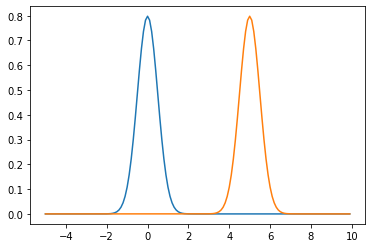

In [69]:
def gaussian(x,mu,sigma):
    return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-((x-mu)**2)/(2*sigma**2))

xt = np.arange(-5,10,.1)
y1=[]
y2=[]
for i in range(len(xt)):
    y1.append(gaussian(xt[i],B_pars[0][0], B_pars[0][1]))
    y2.append(gaussian(xt[i],B_pars[1][0], B_pars[1][1]))
    
plt.plot(xt,y1)
plt.plot(xt,y2)
print(len(xt))

In [70]:
N=100000 #length of sequence
z = np.empty((N))
x = np.empty((N))

#Generating first state and emission
r = np.random.random()
if r<=prob[0]:
    z[0]=0
else:
    z[0]=1
x[0]=np.random.normal(loc=B_pars[0][0],scale=B_pars[0][1])

   
for i in range(1,N):
    if z[i-1]==0:
        c1=A[0][0]
        c2=A[0][1]+c1 #cumulative prob
        a=np.random.random()
        #print(a)
        if a<=c1:             
            z[i]=0
        else:
            z[i]=1
        #emission
        x[i]=np.random.normal(loc=B_pars[0][0],scale=B_pars[0][1])
       
            
    if z[i-1]==1:
        c1=A[1][1]
        c2=A[1][0]+c1 #cumulative prob
        a=np.random.random()
        #print(a)
        if a<=c1:
            z[i]=1
        else:
            z[i]=0
        #emission
        x[i]=np.random.normal(loc=B_pars[1][0],scale=B_pars[1][1])
       



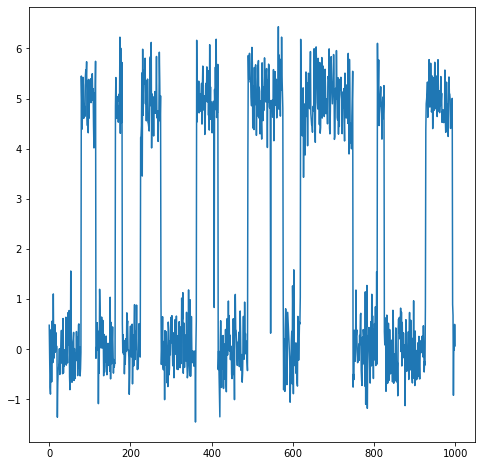

In [72]:
plt.figure(figsize=(8,8))
plt.plot(np.arange(0,1000,1),x[:1000])

In [73]:
x_0 = x[np.where(z==0)]
print(x_0[:10])

[ 0.47838193 -0.2134611  -0.75649996 -0.89478368 -0.35847968  0.39534986
 -0.65118703  0.56073487 -0.09210306 -0.26499228]


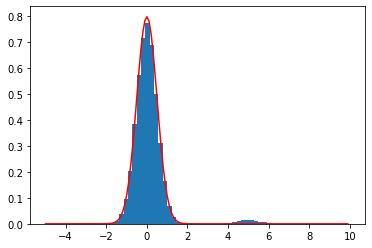

In [74]:
plt.hist(x_0, bins=70, range=(-5,10), density=True)
plt.plot(xt,y1,color='red')

In [24]:
#unique_0, counts_0 = np.unique(x_0, return_counts=True)

In [42]:
#plt.plot(unique_0,counts_0,'o')

In [75]:
x_0.mean()

0.10279592967628681

In [76]:
x_1 = x[np.where(z==1)]

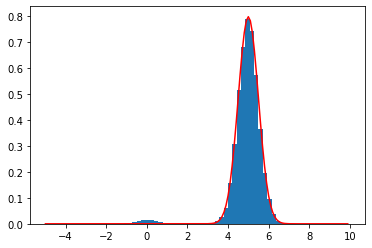

In [77]:
plt.hist(x_1, bins=70, range=(-5,10), density=True)
plt.plot(xt,y2,color='red')

In [50]:
#plt.plot(unique_1,counts_1,'o')

In [78]:
x_1.mean()

4.902258663441307